SAYAN SARKAR - DATA SCIENCE - UNEMPLOYMENT ANALYSIS

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df1=pd.read_csv("F:\\PYTHON AIML\\Unemployment_Rate.csv")
df1.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [25]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [26]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [27]:
df1.columns = ['States', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed','Estimated_Labour_Participation_Rate', 'Region', 'longitude', 'latitude']
df1.head()

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [33]:
df_statistics = df1[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
print(round(df_statistics.describe().T, 2))

                                     count         mean          std  \
Estimated_Unemployment_Rate          267.0        12.24        10.80   
Estimated_Employed                   267.0  13962105.72  13366318.36   
Estimated_Labour_Participation_Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated_Unemployment_Rate               0.50        4.84        9.65   
Estimated_Employed                   117542.00  2838930.50  9732417.00   
Estimated_Labour_Participation_Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated_Unemployment_Rate                16.76        75.85  
Estimated_Employed                   21878686.00  59433759.00  
Estimated_Labour_Participation_Rate        44.06        69.69  


<Axes: >

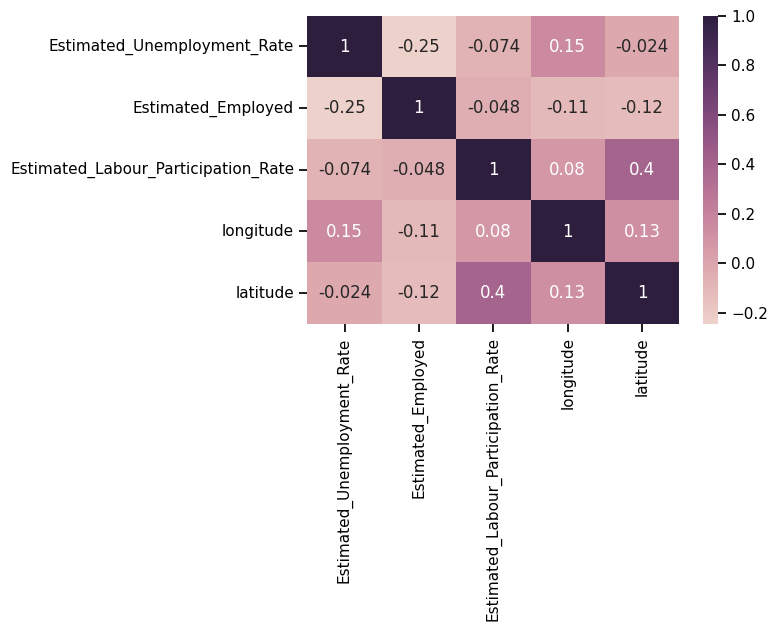

In [28]:
hm = df1[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'longitude', 'latitude']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

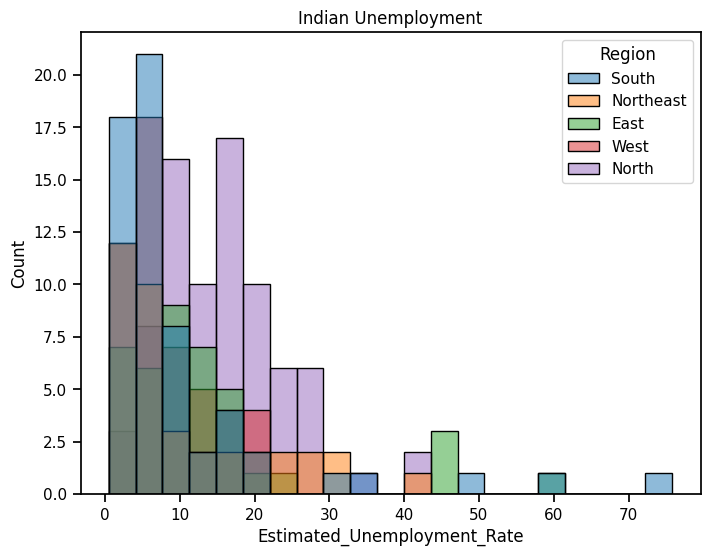

In [36]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(8, 6))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated_Unemployment_Rate", hue="Region", data=df1)
plt.show()

In [40]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [42]:
#Boxplot of Unemployment rate per States
fig = px.box(df1, x='States', y='Estimated_Unemployment_Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [43]:
#Let’s create a dashboard to analyze the unemployment rate of each Indian state by region.
unemploment = df1[["States", "Region", "Estimated_Unemployment_Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], values="Estimated_Unemployment_Rate",  width=700, height=700, color_continuous_scale="RdY1Gn", title="Unemployment Rate in India")
figure.show()